In [ ]:
# Add any comments as a pseudocode of what we need/gonna do

In [ ]:
# Dependencies installation

In [ ]:
# YOLOv8 model config

# Object Detection with YOLOv8

To get started with YOLOv8 object detection, first, install necessary libraries like PyTorch, torchvision, and numpy, ensuring GPU support if available for faster processing.

Then, configure the YOLOv8 model by defining its architecture, choosing between pre-trained or custom-trained models, and adjusting settings like learning rate and batch size. Prepare your dataset by collecting or creating images, annotating them with bounding boxes, and splitting them into training and validation sets.

Train the YOLOv8 model using your dataset, monitoring for loss convergence and overfitting, and applying techniques like data augmentation to enhance performance. Evaluate the trained model using metrics like precision and recall, visualize its performance, and then use it for object detection on new images or videos.

Optionally, fine-tune the model based on feedback, optimize it for deployment, and experiment with compression techniques for resource-constrained devices. Finally, deploy the model in real-world scenarios, integrate it into applications, monitor its performance, and handle any errors gracefully throughout the process.






# ROBOCON Ball Detection Test




In [1]:
!nvidia-smi

Wed Feb 21 01:12:23 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [15]:
from ultralytics import YOLO

from IPython.display import display, Image


In [ ]:
#Install Roboflow, import 2024-4 file

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="JRqBrq8REBsf88PzUOWZ")
project = rf.workspace("draker-master-nybia").project("color-balls")
dataset = project.version(2).download("yolov8")



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycle

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Color-Balls-2 in yolov8:: 100%|██████████| 3224/3224 [00:00<00:00, 8561.36it/s]


Update ultralytics

In [5]:
pip install ultralytics==8.0.196

Train the model

video reference : https://www.youtube.com/watch?v=LNwODJXcvt4&t=47s

In [6]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 165MB/s]
New https://pypi.org/project/ultralytics/8.1.16 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Color-Balls-2/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_w

Successfully trained the model, now need to test the model on an image/video.

In [10]:
from PIL import Image


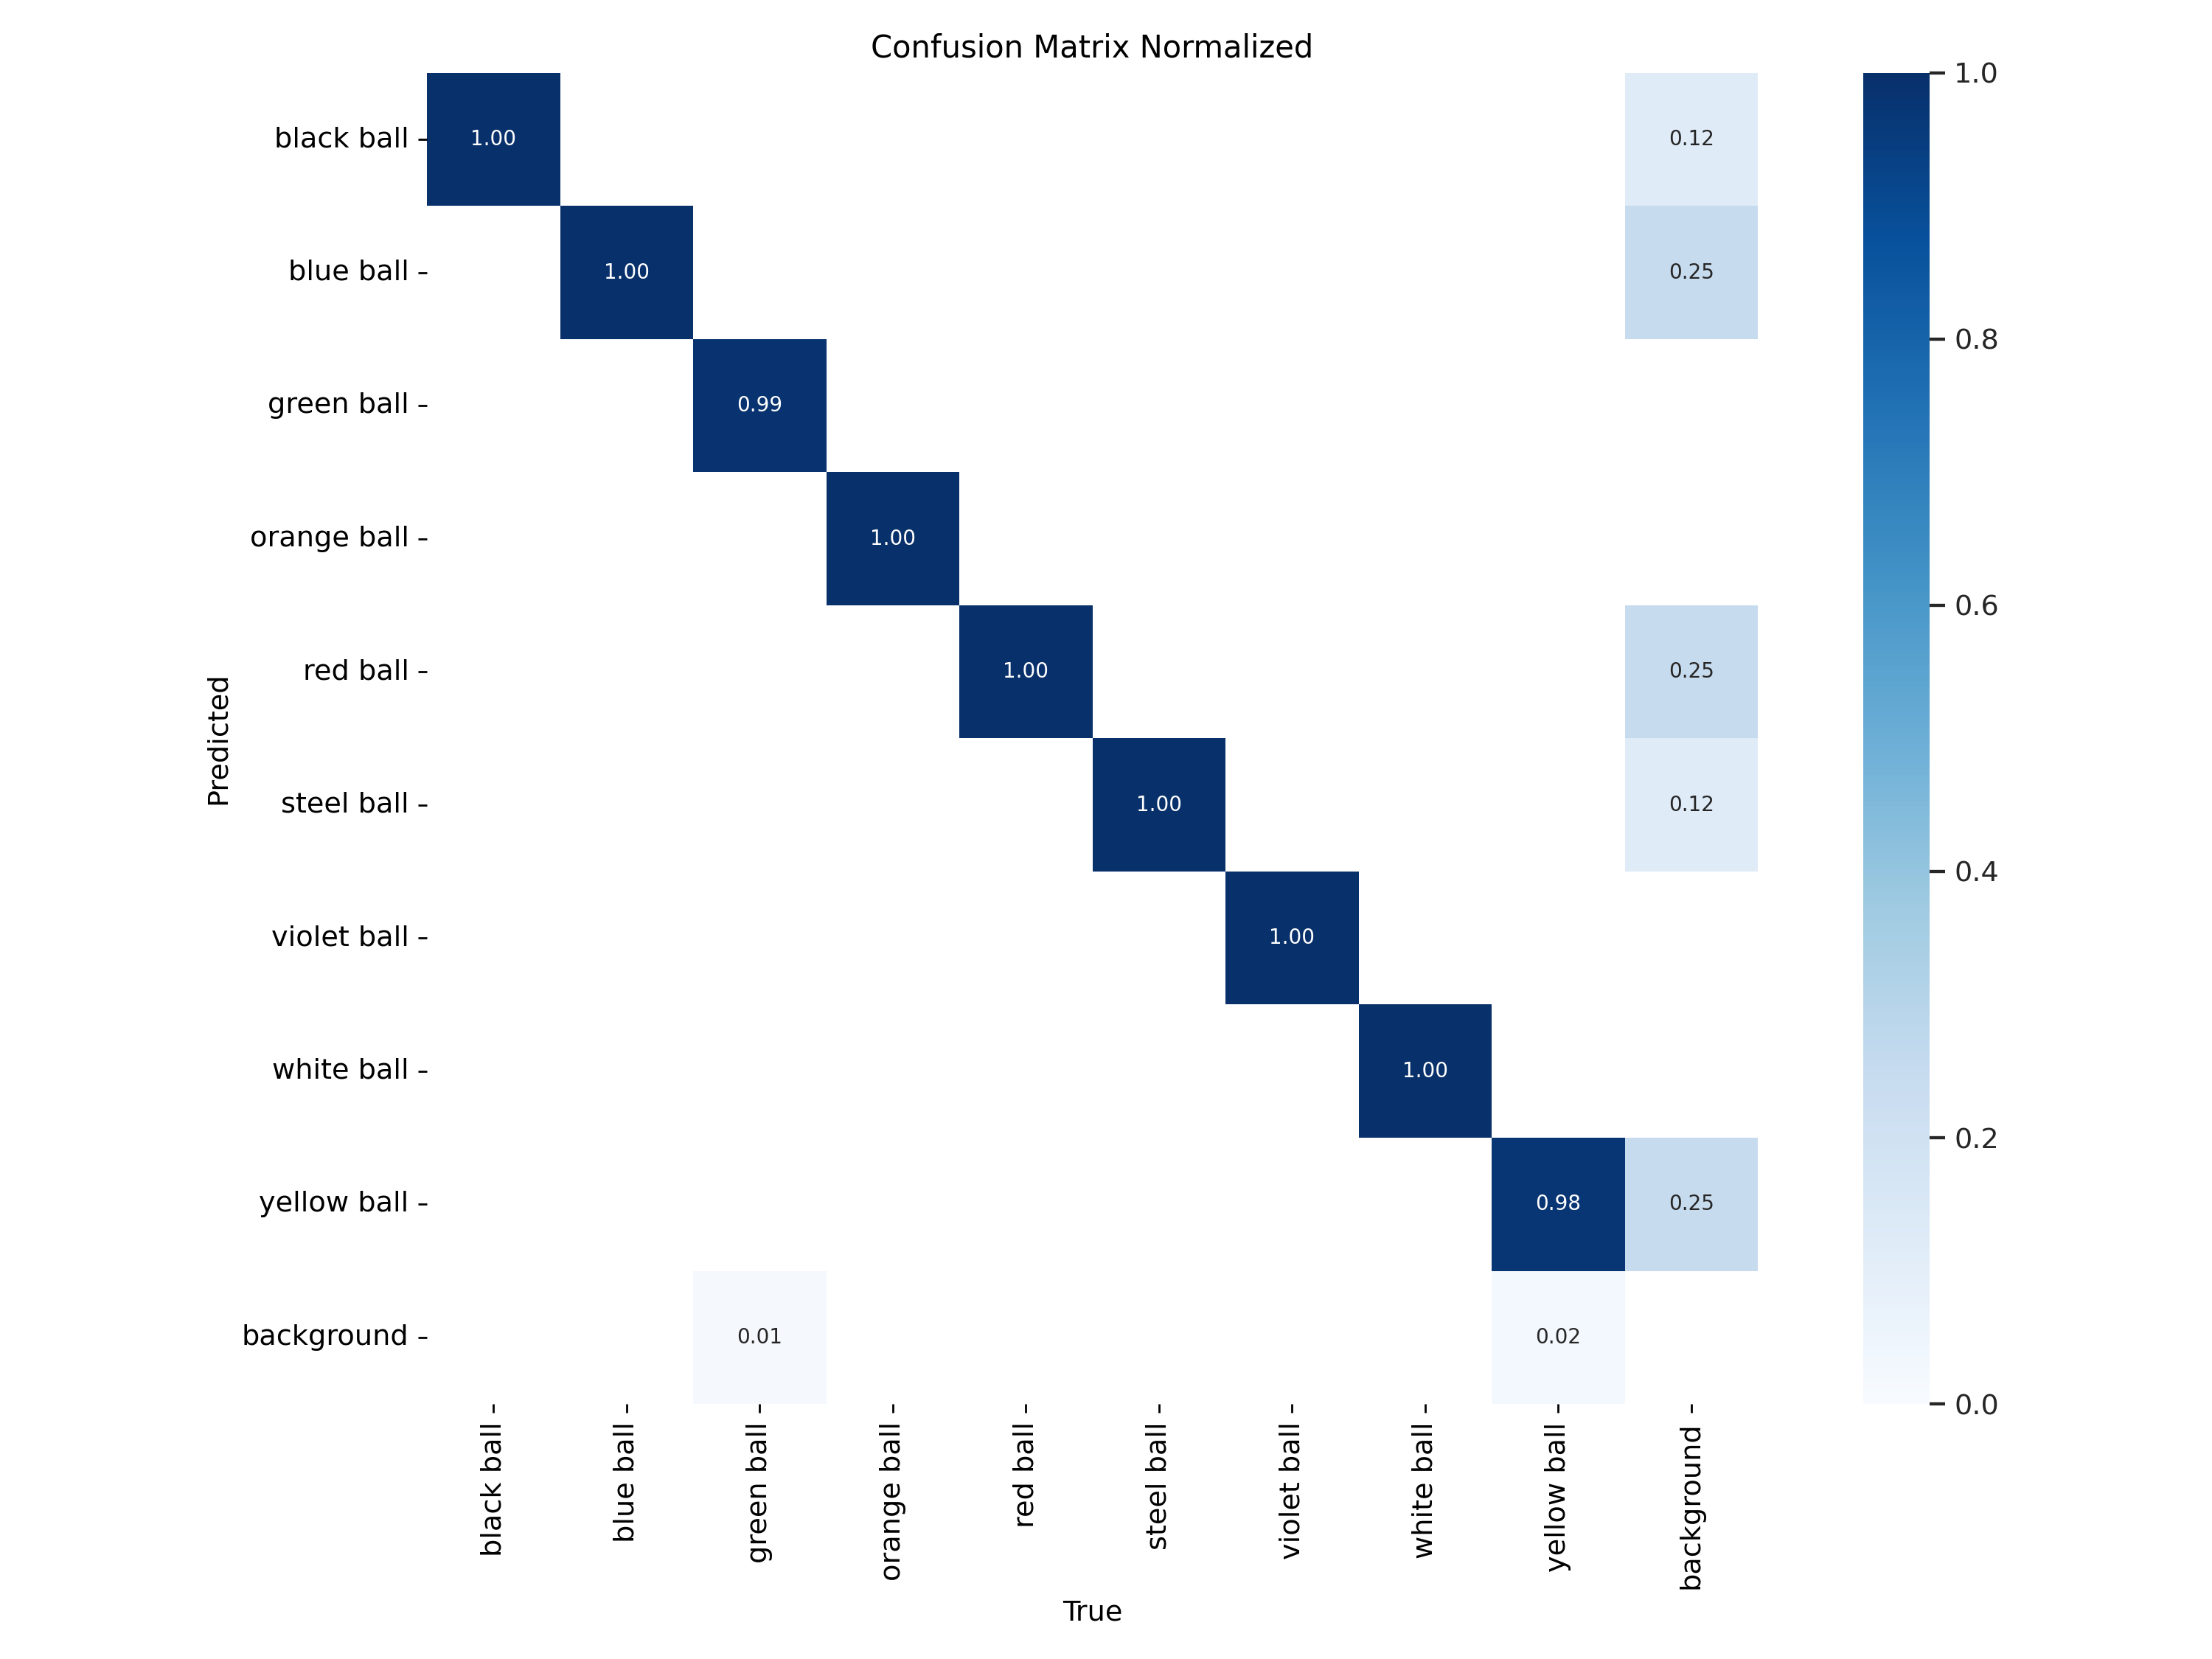

In [19]:
Image(filename=f'/content/runs/detect/train/confusion_matrix_normalized.png', width=600)

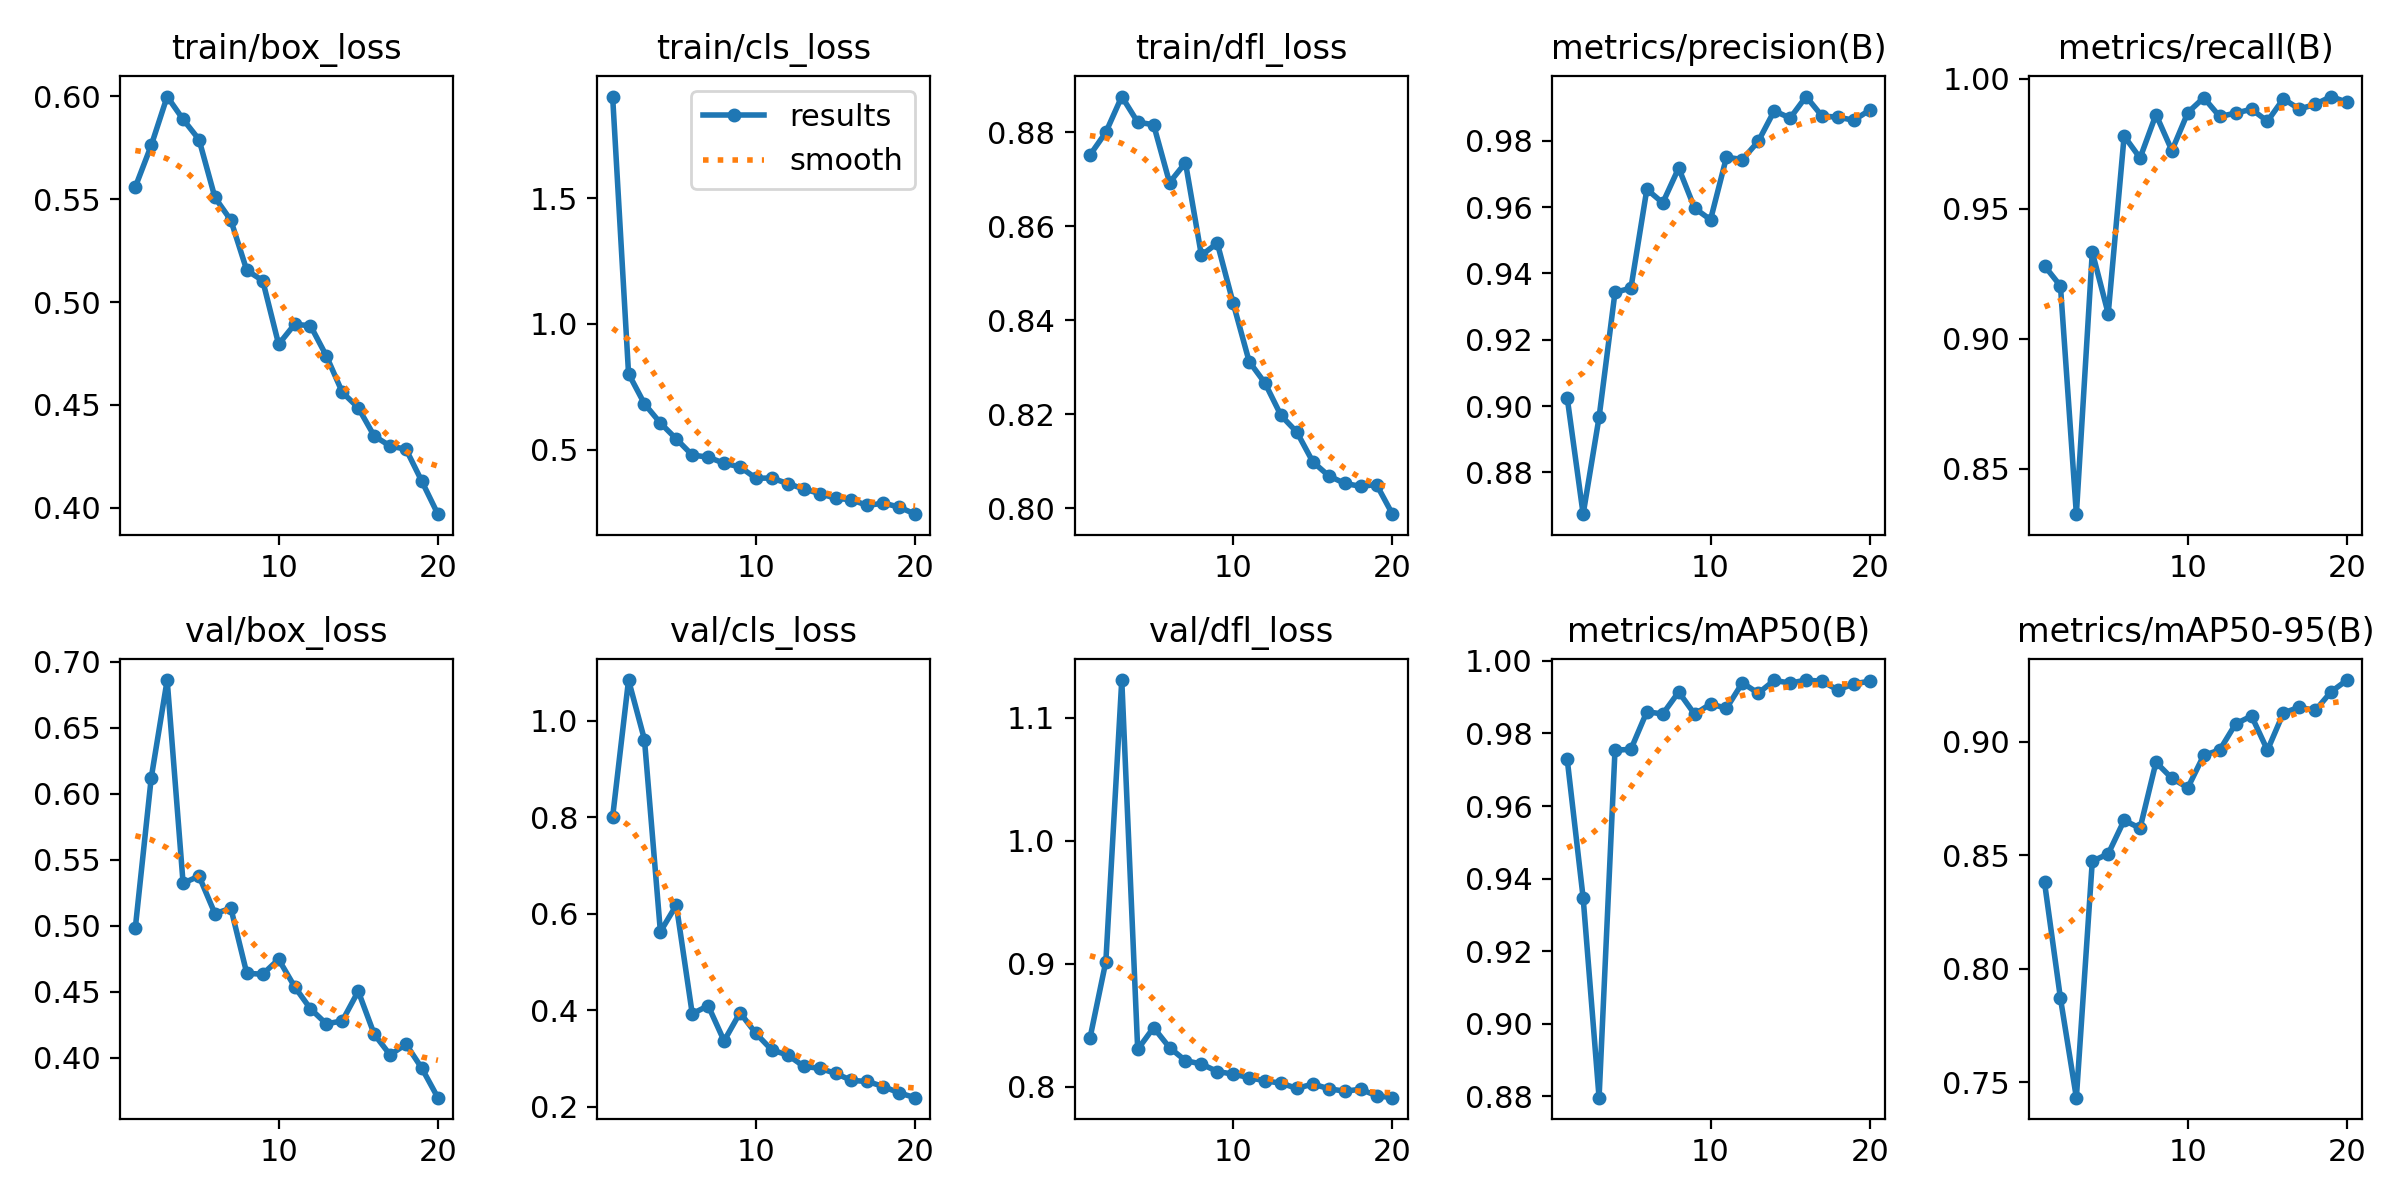

In [20]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [21]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25844971 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Color-Balls-2/valid/labels.cache... 322 images, 0 backgrounds, 0 corrupt: 100% 322/322 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 21/21 [00:09<00:00,  2.31it/s]
                   all        322        515      0.989      0.991      0.994      0.929
            black ball        322         55          1      0.998      0.995      0.925
             blue ball        322         77      0.985          1      0.995      0.869
            green ball        322         68      0.998      0.985      0.994      0.921
           orange ball        322         41      0.996          1      0.995       0.98
              red ball        322         53      0.962          1      0.993      0.938
            steel ball        322         62

In [36]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 data={dataset.location}/data.yaml

WARNING ⚠️ 'source' is missing. Using default 'source=/usr/local/lib/python3.10/dist-packages/ultralytics/assets'.
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25844971 parameters, 0 gradients, 78.7 GFLOPs

image 1/4 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/ball2.png: 416x640 4 red balls, 2 violet balls, 102.1ms
image 2/4 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/ball3.png: 640x512 1 blue ball, 80.9ms
image 3/4 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/ball4.png: 640x480 1 violet ball, 74.1ms
image 4/4 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/balls1.png: 416x640 2 violet balls, 27.8ms
Speed: 2.8ms preprocess, 71.2ms inference, 147.3ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict7
💡 Learn more at https://docs.ultralytics.com/modes/predict


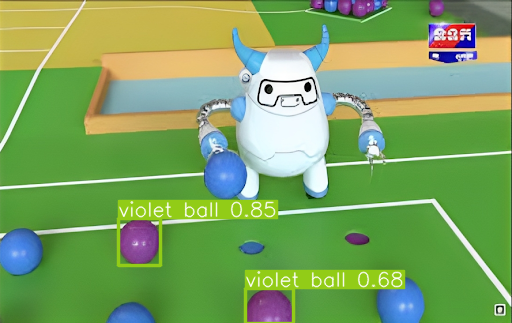

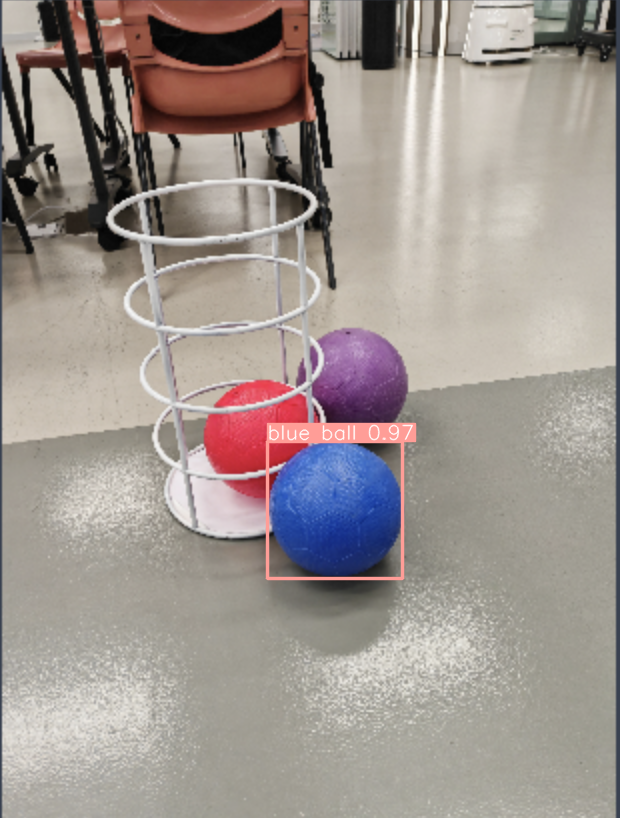

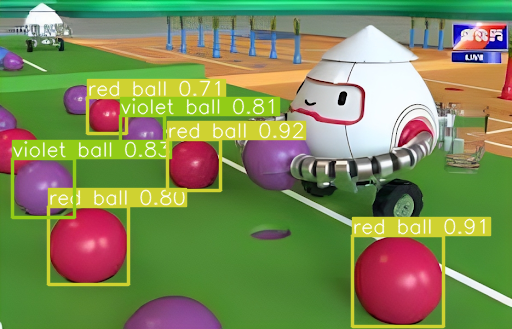

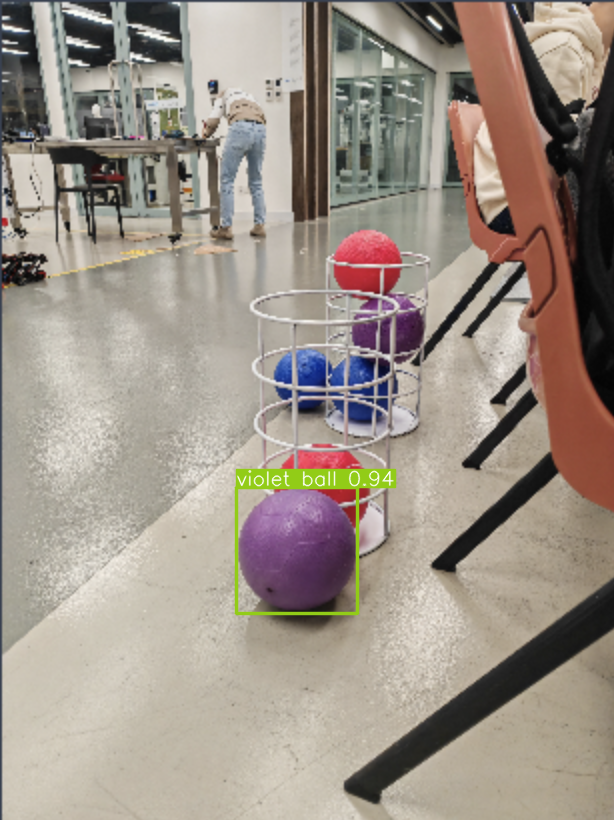

In [38]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict7/*.png'):
  display(Image(filename=image_path, height=600))
  print("\n")

Reference : https://colab.research.google.com/github/ultralytics/ultralytics/blob/main/examples/tutorial.ipynb#scrollTo=X58w8JLpMnjHhttps://colab.research.google.com/github/ultralytics/ultralytics/blob/main/examples/tutorial.ipynb#scrollTo=X58w8JLpMnjH


# Instance Segmentation (WIP)


In [ ]:
# Using dodgeball dataset

from roboflow import Roboflow
rf = Roboflow(api_key="JRqBrq8REBsf88PzUOWZ")
project = rf.workspace("simon-norin-62w7g").project("dodgeball-detection-pcb7n")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Dodgeball-detection-1 in yolov8:: 100%|██████████| 4474/4474 [00:00<00:00, 4905.70it/s]


In [ ]:
# Training model with Python
# https://docs.ultralytics.com/usage/python/

# Load instance segmentation pretrained model
# https://docs.ultralytics.com/tasks/segment/#models
model = YOLO('yolov8n-seg.pt')

# Train the model
results = model.train(data='coco128-seg.yaml', epochs=10, imgsz=640)

New https://pypi.org/project/ultralytics/8.1.16 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=coco128-seg.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic

# Tasks :

0. Train model to identify coloured ball
1. Find videos that has balls. Then test with video for ball detection
2. Add more images to the dataset to improve it, and retrain the model.


*   Same color ball on same color floor
*   Balls overlapping/ hidden
*   background of silo have other balls and ball of other robot holding it
*   etc.




3. After the model finish training, export the code to .py and can use in ardiuno or raspberry pi. to test ball detection using camera

# References

1. Custom Dataset Training : https://blog.roboflow.com/yolov7-custom-dataset-training-tutorial/
2. Roboflow AI : https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb#scrollTo=Wjc1ctZykYuf
3. Download Dataset : https://universe.roboflow.com/iitp-w6lkv/2024-kozt7/dataset/3/download
4. Example using Roboflow: https://inference.roboflow.com/quickstart/explore_models/#run-a-model-on-universe
5. Video explaining how to use : https://www.youtube.com/watch?v=LNwODJXcvt4&t=47s
6. Tutorial and Theory on how to use Machine Learning : https://colab.research.google.com/github/ultralytics/ultralytics/blob/main/examples/tutorial.ipynb
7. Example how to use : https://colab.research.google.com/github/ultralytics/ultralytics/blob/main/examples/tutorial.ipynb#scrollTo=X58w8JLpMnjH

